#   **Pattern recognition course | ECE AUTH | 2nd project | Winter semester 2022**



>   Giachoudis Christos


>   Kostopoulos Andreas Marios

# **General comments**



# Necessary imports

In [2]:
# Importing the necessary libraries and modules
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython import display

# Data that are given by the task

ω1: no stress, 
ω2: stress


P(ω1) = 7/12, 
P(ω2) = 5/12

# **Part A**
#### Given pdf: p(x|theta) = (1/pi) * (1 / (1 + (x-theta)^2))

# **Task A.1**
## Data: 

D1 = [2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1]

D2 = [-4.5, -3.4, -3.1, -3.0, -2.3]

D1 is referring to ω1 class and D2 is referring to ω2 

Estimation of theta1: 2.5999999999875456
Estimation of theta2: -3.1600000000113084


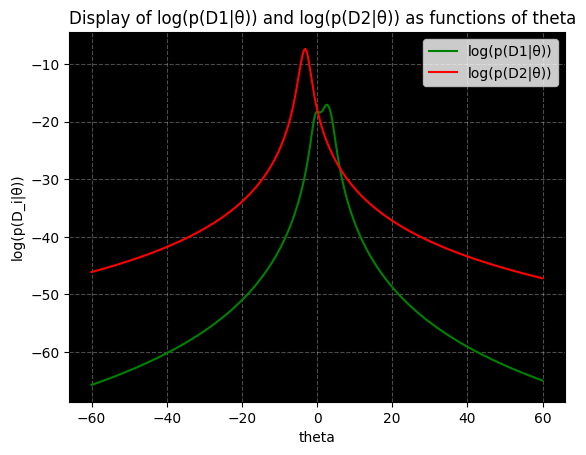

In [3]:
#A-priori probabilities
P_apriori1 = 7/12
P_apriori2 = 5/12

#Data for ω1
D1 = [2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1]

#Data for ω2
D2 = [-4.5, -3.4, -3.1, -3.0, -2.3]

theta = np.arange(-60, 60, 0.01)

#Task A1
p1 = 1
p2 = 1

#Calculating L(θ)
for x in D1:
    p1 *= (1/math.pi)*(1/(1+(x-theta)**2))

for x in D2:
    p2 *= (1/math.pi)*(1/(1+(x-theta)**2))

L1 = np.log(p1)
L2 = np.log(p2)
# print(L1)
# print(L2)
# print(np.amax(L1))
# print(max(L2))
# print(type(L1))

theta1 = theta[L1.argmax()]
print(f"Estimation of theta1: {theta1}")

theta2 = theta[L2.argmax()]
print(f"Estimation of theta2: {theta2}")

ax = plt.axes()
ax.set_facecolor("black")
plt.plot(theta,L1, color="green")
plt.plot(theta,L2, color="red")
plt.title("Display of log(p(D1|θ)) and log(p(D2|θ)) as functions of theta", loc="left")
plt.xlabel("theta")
plt.ylabel("log(p(D_i|θ))")
plt.legend(["log(p(D1|θ))", "log(p(D2|θ))"])
plt.grid(color="white", linestyle="--", alpha=0.3)
plt.show()

# **Task A.2**

discrimination function: g(x) = log(P(x|theta1)) - log(P(x|theta2)) + logP(ω1) - logP(ω2)

where X = D1 U D2 (?)

g is [3.8951553898439766, 0.18769376727702713, -0.31159197656149473, 3.6781857828423945, 0.31168291373696766, 3.4870178275433763, 3.1413717587738073, -2.575313716832764, -3.2184434859088196, -3.171181114669178, -3.11517304837697, -2.3291483065109073] and is size of 12
g1 is [3.8951553898439766, 0.18769376727702713, -0.31159197656149473, 3.6781857828423945, 0.31168291373696766, 3.4870178275433763, 3.1413717587738073] and is size of 7
g2 is [-2.575313716832764, -3.2184434859088196, -3.171181114669178, -3.11517304837697, -2.3291483065109073] and is size of 5


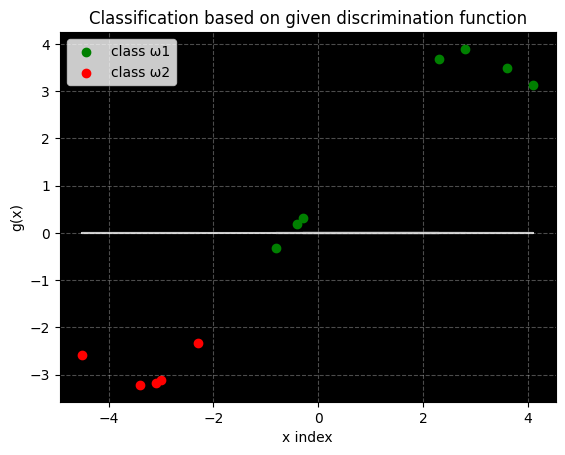

In [3]:
#Index X = D1 U D2
X = D1 + D2

#Discrimination Function g
g = list()

#g = g1 - g2
g1 = list()
g2 = list()

for x in X:
    temp = (np.log((1/math.pi)*(1/(1+(x-theta1)**2))) - np.log((1/math.pi)*(1/(1+(x-theta2)**2)))) + (np.log(P_apriori1) - np.log(P_apriori2))
    g.append(temp)

#g1 and g2 generated from g
g1 = g[:len(D1)]
g2 = g[len(D1):]

print(f"g is {g} and is size of {np.size(g)}")
print(f"g1 is {g1} and is size of {np.size(g1)}")
print(f"g2 is {g2} and is size of {np.size(g2)}")
discrimination_line = [0 for _ in range(len(X))]

#Need to implement subplots if wanted the second one
#Classification and visualisation
ax = plt.axes()
ax.set_facecolor("black")
plt.scatter(D1, g1, color="green")
plt.scatter(D2, g2, color="red")
plt.plot(X, discrimination_line, color="white", alpha=0.8)
plt.title("Classification based on given discrimination function")
plt.xlabel("x index")
plt.ylabel("g(x)")
plt.grid(color="white", linestyle="--", alpha=0.3)
plt.legend(["class ω1", "class ω2"])
plt.show()

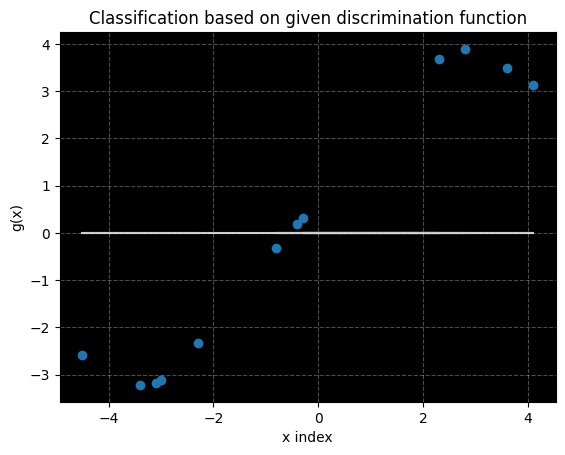

In [4]:
#Just classification
ax = plt.axes()
ax.set_facecolor("black")
plt.scatter(X, g)
plt.plot(X, discrimination_line, color="white", alpha=0.8)
plt.title("Classification based on given discrimination function")
plt.xlabel("x index")
plt.ylabel("g(x)")
plt.grid(color="white", linestyle="--", alpha=0.3)
plt.show()

# **Part B**

Prior probability density function for θ


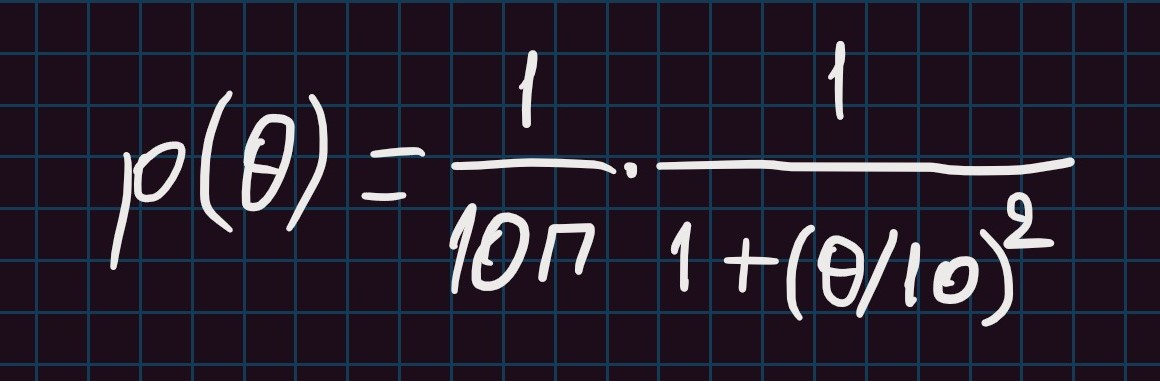

In [4]:
print("Prior probability density function for θ")
display.Image("Part_B.jpg")

___The θ values:___
[-60.   -59.99 -59.98 ...  59.97  59.98  59.99]

___The pdf values:___
[0.0008603  0.00086058 0.00086086 ... 0.00086113 0.00086086 0.00086058]

___The plot of the pdf:___


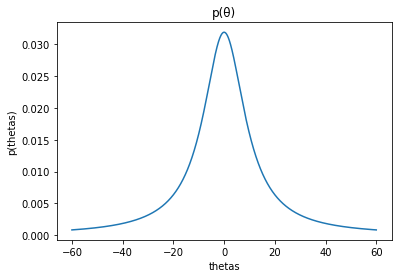

In [5]:
# Prior probability density function for θ
begin = -60
end = 60
step = 0.01
theta = np.arange(begin, end, step)
p_theta = (1/(10*math.pi)) * (1/(1 + (theta/10)**2))

# Print θ and pdf values to be sure
print("___The θ values:___")
print(theta)
print("")
print("___The pdf values:___")
print(p_theta)
print("")

# Plot the pdf
print("___The plot of the pdf:___")
plt.title("p(θ)") 
plt.xlabel("thetas") 
plt.ylabel("p(thetas)") 
plt.plot(theta, p_theta) 
plt.show()

# **Task B.1**

> Computation of p(θ|D1) and p(θ|D2)

Prior probability density function for θ


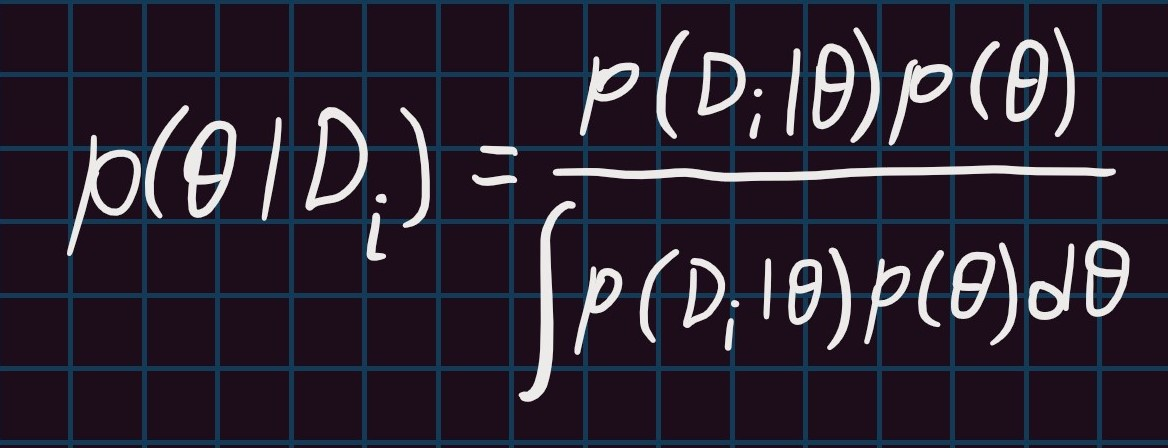

In [6]:
print("Prior probability density function for θ")
display.Image("p_theta_D.jpg")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


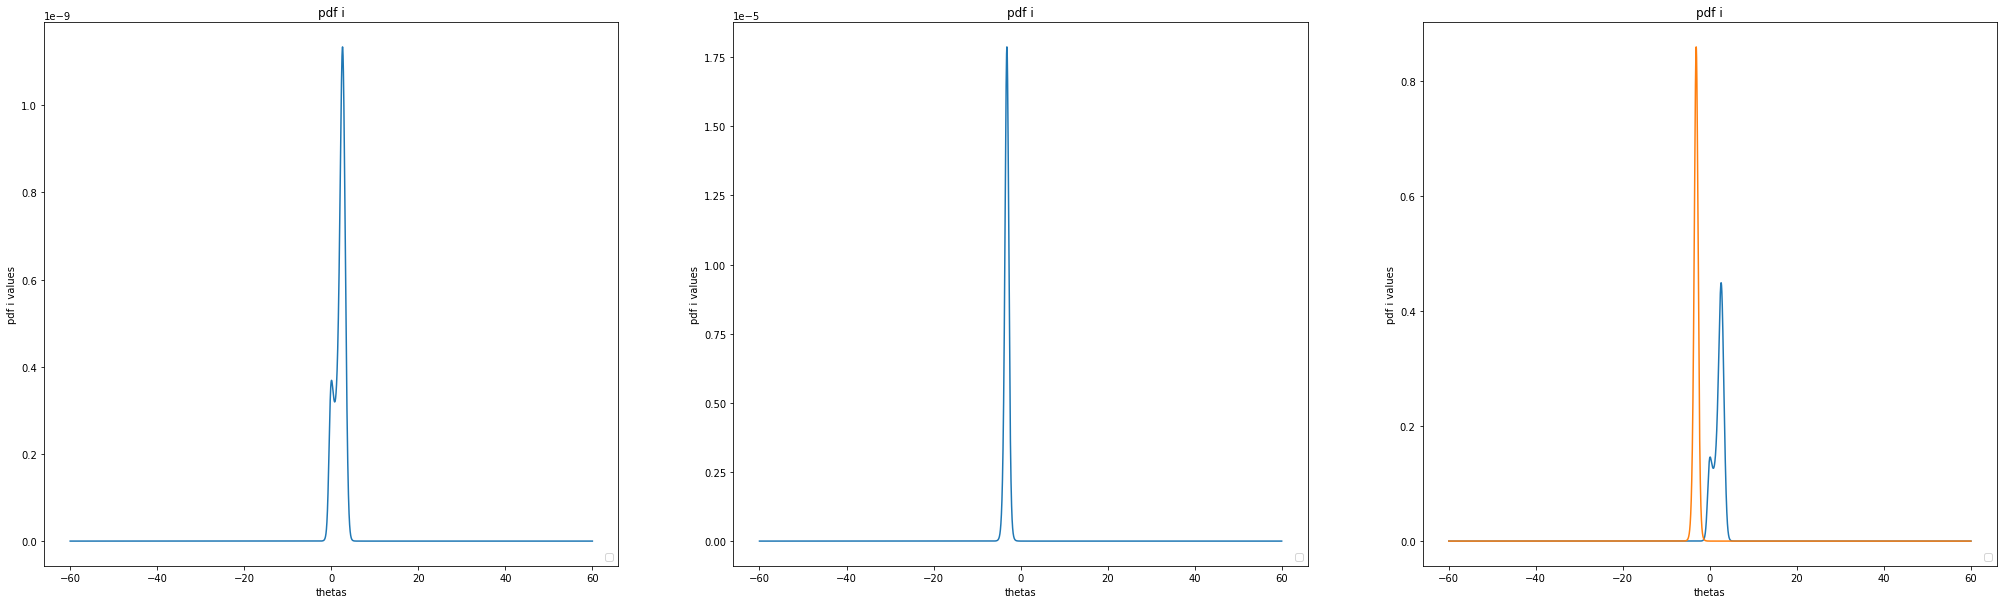

In [17]:
# p(D_i|θ) exists because of task A.1
# p(θ) has been computed at the beginning of task B

# Multiplication computation for both the denominator and the numerator
numerator1 = np.multiply(p1, p_theta)
numerator2 = np.multiply(p2, p_theta)

# Integral computation (Approximation using sum)
integral1 = 0
integral2 = 0
for i in range(1, numerator1.size):
    integral1 += ((numerator1[i] + numerator1[i-1]) * step) / 2
for i in range(numerator2.size):
    integral2 += ((numerator2[i] + numerator2[i-1]) * step) / 2

# p(θ|D_i) computation
p_theta_D1 = numerator1/integral1
p_theta_D2 = numerator2/integral2

# Plot the computed pdfs
# first one
fig = plt.figure(figsize=(35, 10))
ax = fig.add_subplot(1, 3, 1)
plt.title("pdf i")
plt.xlabel("thetas")
plt.ylabel("pdf i values")
plt.plot(theta, p_theta_D1)
plt.legend(loc = "lower right")

# second one
ax = fig.add_subplot(1, 3, 2)
plt.title("pdf i")
plt.xlabel("thetas")
plt.ylabel("pdf i values")
plt.plot(theta, p_theta_D2)
plt.legend(loc = "lower right")

# Plot p(θ) and p(θ|D_i) to compare
ax = fig.add_subplot(1, 3, 3)
plt.title("pdf i")
plt.xlabel("thetas")
plt.ylabel("pdf i values")
plt.plot(theta, p_theta_D1)
plt.plot(theta, p_theta_D2)
plt.legend(loc = "lower right")

# Show all plots
plt.show()

# **Task B.2**